 # 1. Import the necessary packages


In [2]:
# import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [383]:
# Remove the 
pd.options.display.float_format = '${:,.2f}'.format
from IPython.core.display import HTML
HTML('<style>.container {width:100% !important;}>link</style>')

# 2. Read the 3 datasets into dataframes

In [288]:
#1. Read the users data set information
users = pd.read_csv('user.csv', names =['UserID','Age','Gender','Occupation','Zip code'])
users.head()

,UserID,Age,Gender,Occupation,Zip code
0,user id,age,gender,occupation,zip code
1,1,24,M,technician,85711
2,2,53,F,other,94043
3,3,23,M,writer,32067
4,4,24,M,technician,43537


In [289]:
#2. Read the movies dataset information
movies = pd.read_csv('item.csv')
movies.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [290]:
#2. Read the ratings dataset information
data = pd.read_csv('data.csv',names= ['UserID', 'ItemID', 'rating', 'Timestamp' ])
data.head()

,UserID,ItemID,rating,Timestamp
0,user id,movie id,rating,timestamp
1,196,242,3,881250949
2,186,302,3,891717742
3,22,377,1,878887116
4,244,51,2,880606923


In [291]:
#3. Read the ratings dataset information


## 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations 

In [292]:
# info, shape and describe and missing values of the user dataset
# information dataset of users data
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      944 non-null    object
 1   Age         944 non-null    object
 2   Gender      944 non-null    object
 3   Occupation  944 non-null    object
 4   Zip code    944 non-null    object
dtypes: object(5)
memory usage: 37.0+ KB


In [293]:
# describe datasets of the users data
users.describe().T

,count,unique,top,freq
UserID,944,944,397,1
Age,944,62,30,39
Gender,944,3,M,670
Occupation,944,22,student,196
Zip code,944,796,55414,9


In [294]:
# describe shapes of the users data
users.shape

(944, 5)

In [295]:
#checking the missing values of the users data
users.isna().apply(pd.value_counts)

,UserID,Age,Gender,Occupation,Zip code
False,944,944,944,944,944


In [296]:
# info, shape and describe, and missing values of the movie dataset
# information dataset of users data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [297]:
# describe datasets of the users data
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [298]:
# describe shapes of the users data
movies.shape

(1681, 22)

In [299]:
#checking the missing values of the users data
movies.isna().apply(pd.value_counts)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
False,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681,...,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681


In [300]:
# info, shape and describe, and missing values of the rating dataset
# information dataset of users data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   UserID     100001 non-null  object
 1   ItemID     100001 non-null  object
 2   rating     100001 non-null  object
 3   Timestamp  100001 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


In [301]:
# describe datasets of the users data
data.describe().T

,count,unique,top,freq
UserID,100001,944,405,737
ItemID,100001,1683,50,583
rating,100001,6,4,34174
Timestamp,100001,49283,891033606,12


In [302]:
# describe shapes of the users data
data.shape

(100001, 4)

In [303]:
#checking the missing values of the users data
data.isna().apply(pd.value_counts)

,UserID,ItemID,rating,Timestamp
False,100001,100001,100001,100001


## 4. Find the number of movies per genre using the item data 

In [304]:
# this can be done two ways
movies.sum(axis = 0, skipna = True) 

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

In [305]:
# alternative solution to check the number of movies for each genere
l = []

for i in movies.loc[:,'unknown' : 'Western'].columns:
    b = movies[i].value_counts()[1]
    l.append(b)
    print(i,b)

unknown 1
Action 251
Adventure 135
Animation 42
Childrens 122
Comedy 505
Crime 109
Documentary 50
Drama 725
Fantasy 22
Film-Noir 24
Horror 92
Musical 56
Mystery 61
Romance 247
Sci-Fi 101
Thriller 251
War 71
Western 27


## 5. Drop the movie where the genre is unknown

In [306]:
# step 1. as there is no specific column that has a column name called genre, we have to assign values to the genre
new_movies = pd.DataFrame()
new_movies['Genre'] = movies.loc[:,'unknown' : 'Western'].columns
new_movies['Counts'] = l
new_movies

,Genre,Counts
0,unknown,1
1,Action,251
2,Adventure,135
3,Animation,42
4,Childrens,122
5,Comedy,505
6,Crime,109
7,Documentary,50
8,Drama,725
9,Fantasy,22


In [307]:
# step 2. the above query gives the result and we 
#can filter in pandas to choose only movies for value of unknown = 1
# to choose we can call and it provides one row with 22 columns that has an id of 1373
movies[movies['unknown']== 1]


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [308]:
# step3. drop the unknown genre
movies.drop(movies[movies['unknown'] == 1].index, axis=0, inplace=True)
movies.drop(columns= 'unknown',inplace=True)

##  6. Find the movies that have more than one genre

In [309]:
# this question is a big vague but here is the solution
# the head() function is used to limit the testing to the top 5 records

number_of_genres = movies.sum(axis=1)
movies[number_of_genres > 1].head()


,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [310]:
#
print(movies['movie title'],movies.sum(axis=1))

0                                Toy Story 
1                                GoldenEye 
2                               Four Rooms 
3                               Get Shorty 
4                                  Copycat 
                       ...                 
1676                            Mat' i syn 
1677                             B. Monkey 
1678                         Sliding Doors 
1679                          You So Crazy 
1680    Scream of Stone (Schrei aus Stein) 
Name: movie title, Length: 1680, dtype: object 0          4
1          5
2          4
3          7
4          8
        ... 
1676    1679
1677    1681
1678    1682
1679    1682
1680    1683
Length: 1680, dtype: int64


## 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation'

In [311]:
# bar chart plot to view the distribution of rating in all of the movies database
# Bar chart to view distribution of ratings accross all movies
x = data.rating.value_counts().index    
y = [data['rating'].value_counts()[i]/1000 for i in x]   

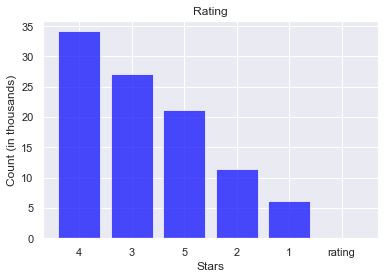

In [331]:
# plot the bar chart
plt.bar(x,y, align='center',color = 'blue', alpha = 0.7)  #plot a bar chart
plt.xlabel('Stars')
plt.ylabel('Count (in thousands)')
plt.title('Rating')
plt.show()

In [ ]:
# below is a distplot for the age data across movies
sns.set()    #setting seaborn style to default
sns.distplot(users.Age)
plt.show()

In [316]:
# release year is drived from release date data by spliting the year from the data
movies['release_year'] = movies['release date'].str.split('-', expand = True)[2]

In [317]:
movies['release_year'] = movies.release_year.astype(int)

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


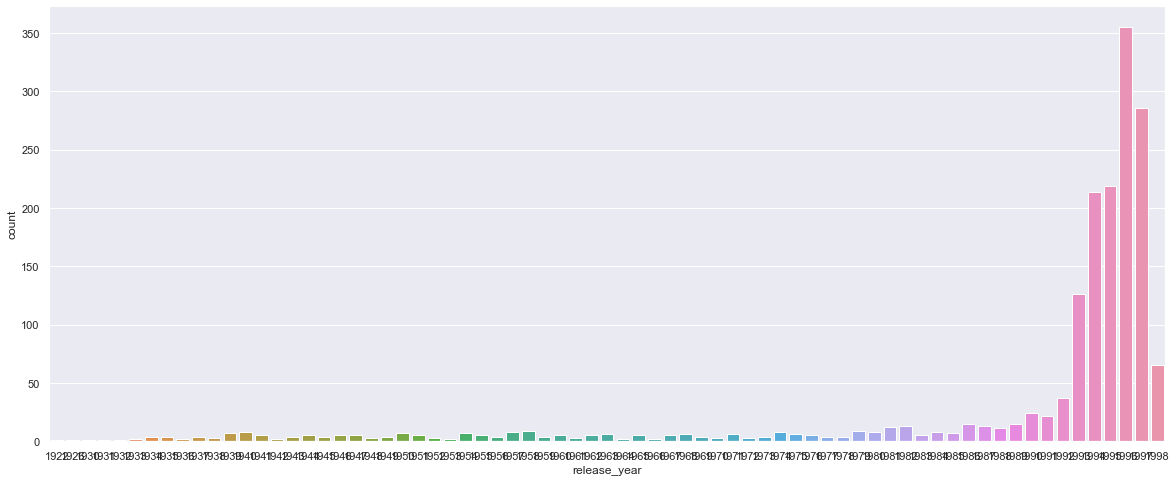

In [318]:
plt.figure(figsize=(20,8))    
sns.countplot(movies.release_year)
plt.show()

C:\Users\Kemal Endeshaw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


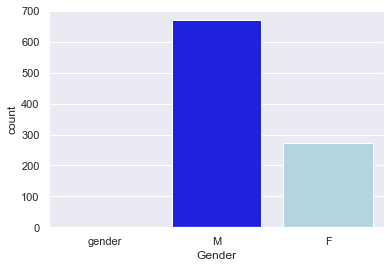

In [320]:
# gender distribution can be calculated with out any further caluclation like that of release year
sns.countplot(users.Gender, palette=['lightblue','blue'])
plt.show()

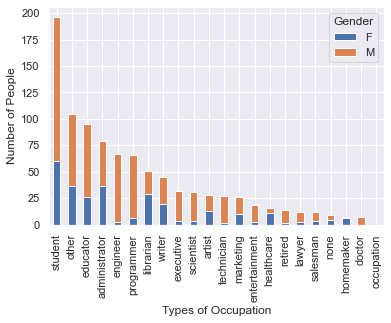

In [324]:
# Occupation can be ploted from the users dataset
ctab = pd.crosstab(users['Occupation'], users['Gender'])
ctab['total'] = ctab.sum(axis=1)
ctab.sort_values('total', ascending=False)[['F','M']].plot.bar(stacked=True)
plt.xlabel('Types of Occupation')
plt.ylabel('Number of People')
plt.show()

## 8. Visualize how popularity of genres has changed over the years

In [ ]:
#
genre_by_year = movies.groupby('release_year').sum()

In [ ]:
genre_by_year = movies.groupby('release_year').sum()
genre_by_year = genre_by_year.drop(columns = 'movie id').T
genre_by_year

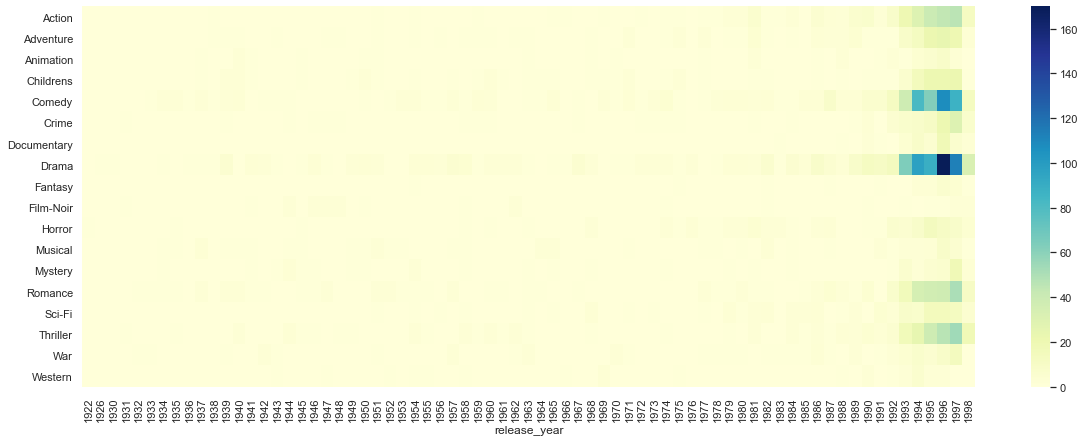

In [381]:
plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(genre_by_year, cmap='YlGnBu')  #heat map to plot the above table
plt.show()

## 9.  Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times

In [204]:
#Find the count of ratings and average ratings for every movie
items = data.groupby('ItemID').count()
items.head()

,UseID,rating,Timestamp
ItemID,,,
1,452,452,452
10,89,89,89
100,508,508,508
1000,10,10,10
1001,17,17,17


In [205]:
#Slice the movies which have ratings more than 100.
items = data.groupby('ItemID').count()
items.head()

,UseID,rating,Timestamp
ItemID,,,
1,452,452,452
10,89,89,89
100,508,508,508
1000,10,10,10
1001,17,17,17


In [206]:
#Slice the movies which have ratings more than 100.

items = data.groupby('ItemID').count()
items = items[data.groupby('ItemID').count().UseID > 100]


In [207]:
#Sort values according to average rating such that movie which highest rating is on top.

items = items.sort_values('rating',ascending = False)
items

,UseID,rating,Timestamp
ItemID,,,
50,583,583,583
258,509,509,509
100,508,508,508
181,507,507,507
294,485,485,485
...,...,...,...
232,101,101,101
926,101,101,101
378,101,101,101


In [208]:
rating_list = items.rating[0:25]

In [211]:
# prepare the items object from the movies data set
movies.columns
items = movies.loc[movies['movie id'].isin(order)]
items

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year


In [212]:
top_25_movies = movies.iloc[0:25, 0]
top_25_movies

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
Name: movie id, dtype: int64

In [213]:
top_25_movies = top_25_movies.reset_index()

In [214]:
top_25_movies['avg_rating'] =  rating_list.values

In [215]:
top_25_movies

,index,movie id,avg_rating
0,0,1,583
1,1,2,509
2,2,3,508
3,3,4,507
4,4,5,485
5,5,6,481
6,6,7,478
7,7,8,452
8,8,9,431
9,9,10,429


## 10. Check for the validity of the below statements with respect to the data provided


In [366]:
# check the columns of the movies
movies.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'release_year'],
      dtype='object')

In [367]:
# check the columns of the user

users.columns

Index(['UserID', 'Age', 'Gender', 'Occupation', 'Zip code'], dtype='object')

In [368]:
# check the columns of the data
data.columns

Index(['UserID', 'ItemID', 'rating', 'Timestamp'], dtype='object')

In [369]:
#rating validity
data.rename(columns= {'UserID' : 'UserID'}, inplace=True) 

In [370]:

result = pd.merge(data, users, how='inner', on='UserID')

In [371]:
movies.rename(columns= {'movie id' : 'ItemID'}, inplace= True)

In [ ]:
result = pd.merge(result, movies, how='inner', on='UserID')

In [374]:
result.head()

,UserID,ItemID,rating,Timestamp,Age,Gender,Occupation,Zip code
0,user id,movie id,rating,timestamp,age,gender,occupation,zip code
1,196,242,3,881250949,49,M,writer,55105
2,196,393,4,881251863,49,M,writer,55105
3,196,381,4,881251728,49,M,writer,55105
4,196,251,3,881251274,49,M,writer,55105


In [375]:
Genre_by_gender['total'] = Genre_by_gender.sum(axis = 1)

In [ ]:
Genre_by_gender = result.groupby('Gender').sum().loc[:,'Action':'Western']

In [376]:
Genre_by_gender

,UserID,ItemID,rating,Timestamp,Age,Occupation,Zip code,total
Gender,,,,,,,,
F,1861861861861861861861861861861861861861861861...,3025662501482634709832813855884069259773225333...,3514353444153513432424451455314445443325534325...,8917177428790236638790236078917197748790235718...,3939393939393939393939393939393939393939393939...,executiveexecutiveexecutiveexecutiveexecutivee...,0000000000000000000000000000000000000000000000...,1861861861861861861861861861861861861861861861...
M,1961961961961961961961961961961961961961961961...,2423933812516556730623866311158025286946928428...,3443554454245355443324333345344523244311354355...,8812509498812518638812517288812512748812517938...,4949494949494949494949494949494949494949494949...,writerwriterwriterwriterwriterwriterwriterwrit...,5510555105551055510555105551055510555105551055...,1961961961961961961961961961961961961961961961...
gender,user id,movie id,rating,timestamp,age,occupation,zip code,user idmovie idratingtimestampageoccupationzip...


In [ ]:
# the percentage of men and women 
Genre_by_gender.div(Genre_by_gender.total, axis= 0) * 100

# Below are the conclusions 
Men watch more drama than women - True
Men watch more Romance than women - True
Women watch more Sci-Fi than men - False
20% of the women watched Drama and of all the men, 18% watched Drama
8% of the men watched romance whereas nearly 10% of woman have watched romance.
4.8% women watched Sci-Fi and of all the men, 6.3% watched Sci-Fi
